In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
#df =pd.read_excel('sample_brands.xlsx') # Use the correct file path
df = pd.read_excel("sample_brands.xlsx", sheet_name='data')


# Basic information about the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   brand_id             5839 non-null   int64         
 1   created              5839 non-null   datetime64[ns]
 2   lastActive           5831 non-null   datetime64[ns]
 3   planLevel            5839 non-null   int64         
 4   num_sub_user         5839 non-null   int64         
 5   role                 5833 non-null   object        
 6   industry_categories  5816 non-null   object        
 7   bantScore            1295 non-null   float64       
 8   companySize          2406 non-null   object        
 9   onboarding_stage     5600 non-null   float64       
 10  country              4835 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 501.9+ KB
None
          brand_id    planLevel  num_sub_user    bantScore  onbo

In [14]:
null_counts = df.isnull().sum()
print(null_counts)


brand_id                  0
created                   0
lastActive                8
planLevel                 0
num_sub_user              0
role                      6
industry_categories      23
bantScore              4544
companySize            3433
onboarding_stage        239
country                1004
dtype: int64


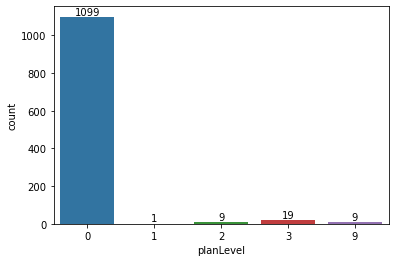

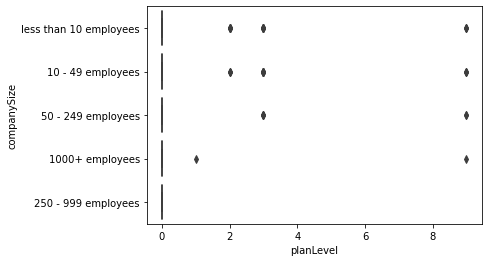

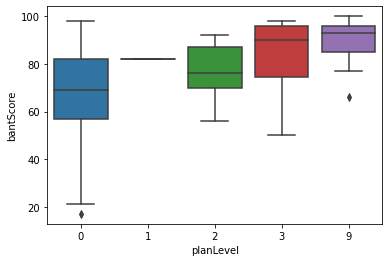

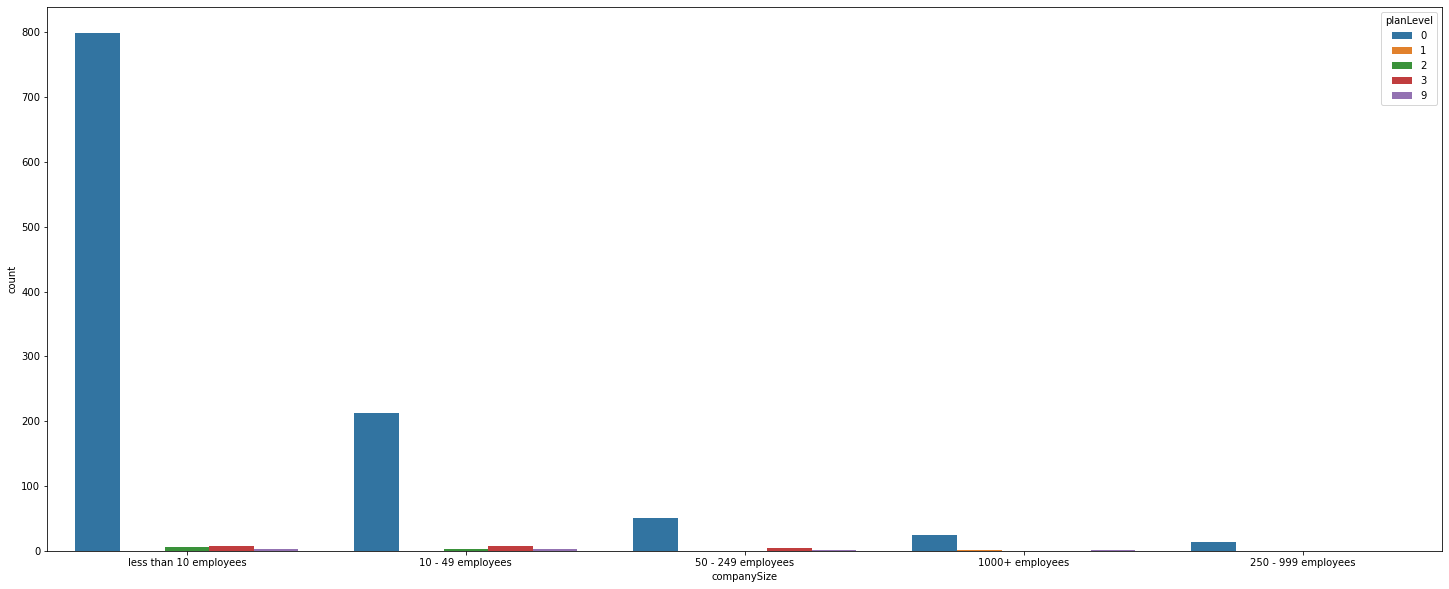

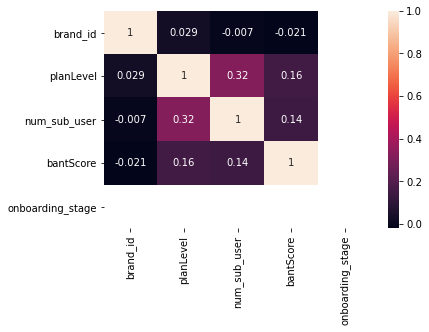

In [24]:
# Data Cleaning and Processing
# Convert 'created' and 'lastActive' to datetime format if not already
df['created'] = pd.to_datetime(df['created'])
df['lastActive'] = pd.to_datetime(df['lastActive'])

# Handle missing values
# You need to decide how to handle missing values based on your specific context
df = df.dropna() # This line drops rows with any missing values

# Data Exploration
# Explore the distribution of 'planLevel'
ax = sns.countplot(x='planLevel', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Explore the relationship between 'companySize' and 'planLevel'
sns.boxplot(x='planLevel', y='companySize', data=df) 
plt.show()

# Explore the relationship between 'bantScore' and 'planLevel'
sns.boxplot(x='planLevel', y='bantScore', data=df)
plt.show()

# If 'companySize' is a categorical variable, use countplot
plt.figure(figsize=(25, 10))
sns.countplot(x='companySize', hue='planLevel', data=df)
plt.show()

# Correlation Matrix
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

# Additional exploration and visualization here...


In [26]:
#Filling missing values for lastActive with the median:
df['lastActive'] = df['lastActive'].fillna(df['lastActive'].median())
#Filling missing values for role with the most frequent value:
df['role'] = df['role'].fillna(df['role'].mode()[0])
#Filling missing values for industry_categories with 'Unknown':
df['industry_categories'].fillna('Unknown')
#Dropping bantScore due to the significant number of missing values:
df = df.drop(['bantScore'], axis=1)
#Dropping companySize due to the significant number of missing values:
df = df.drop(['companySize'], axis=1)
#Filling missing values for onboarding_stage with the median:
df['onboarding_stage'].fillna(df['onboarding_stage'].median(), inplace=True)
#Filling missing values for country with 'Unknown':
df['country'].fillna('Unknown', inplace=True)


In [27]:
#Feature Engineering
df['created_year'] = df['created'].dt.year
df['created_month'] = df['created'].dt.month
df['created_day'] = df['created'].dt.day
df['created_hour'] = df['created'].dt.hour

df['lastActive_year'] = df['lastActive'].dt.year
df['lastActive_month'] = df['lastActive'].dt.month
df['lastActive_day'] = df['lastActive'].dt.day
df['lastActive_hour'] = df['lastActive'].dt.hour


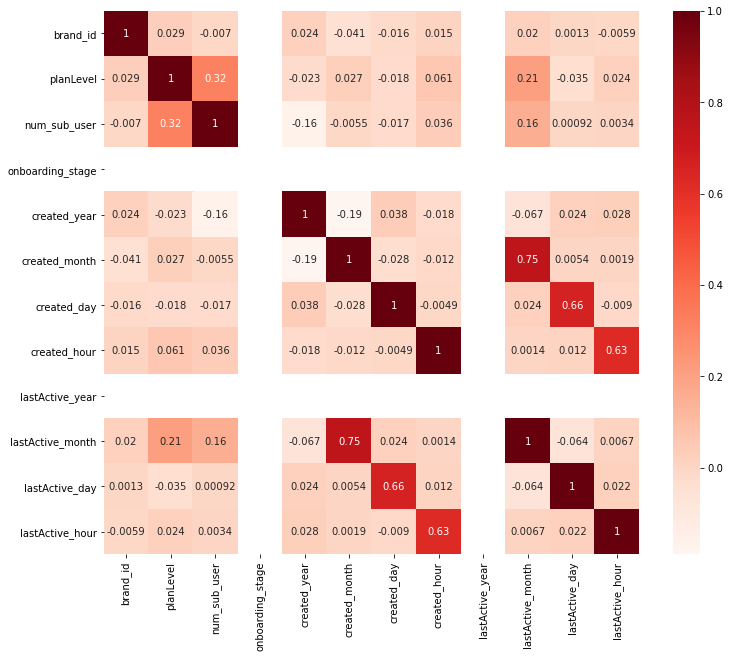

In [29]:
#Exploratory Data Analysis
df = df.drop(['created', 'lastActive'], axis=1)

# Correlation Matrix
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

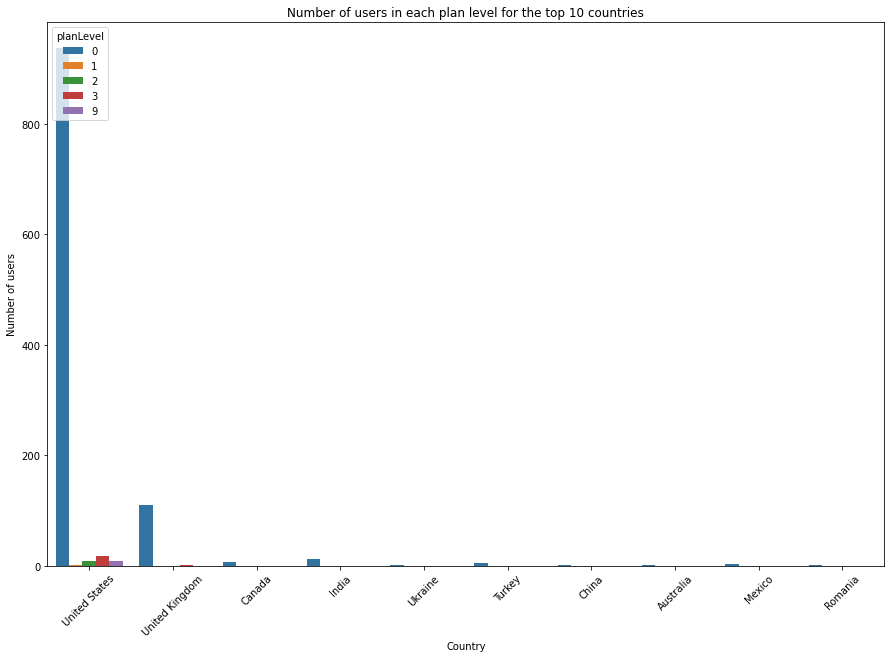

In [30]:
# First, let's find the top 10 countries
top_countries = df['country'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 countries
df_top_countries = df[df['country'].isin(top_countries)]

# Now, let's create the bar plot using seaborn
plt.figure(figsize=(15,10))
sns.countplot(data=df_top_countries, x='country', hue='planLevel')
plt.title('Number of users in each plan level for the top 10 countries')
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Let's create a binary target variable indicating whether a user has subscribed or not
df['is_subscribed'] = df['planLevel'].apply(lambda x: 1 if x > 0 else 0)

# Select features and target
features = df[['num_sub_user', 'bantScore', 'onboarding_stage']].copy()
features['bantScore'] = features['bantScore'].fillna(features['bantScore'].median())  # fill missing values
features['onboarding_stage'] = features['onboarding_stage'].fillna(features['onboarding_stage'].median())
target = df['is_subscribed']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


KeyError: "['bantScore'] not in index"